## Notebook presents the collected data from different perspectives:
- PART 1: Plots showing the dependency of infections/deaths caused by COVID19 and vaccination percentage in counties.
- PART 2: Plots showing the dependency of infections/deaths caused by COVID19 and vaccination percentage in counties and visualizing the population size or population density by the size of the points.
- PART 3: Three plots which represent the whole data cut into 3 parts, dependent on either 'Population' or 'Population Density' properties. The two cutoff points can be define below.
- PART 4: Data is also cut off like PART 3, but it is in one plot and instead colors are used

In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
# Data file [from here data is read from]
filename = 'data/vax_cases_deaths.csv'

In [400]:
#Path to save figures
path = "figures/"

In [401]:
# This iformation is needed for the title of the figures. THE PERIOD MUST BE SAME AS IN FILE 'Vax_cases_deaths.ipynb' or you can only fill period_start with a custom name and leave period_end blank
period_start = '05/01/2021'
period_end = '01/31/2022'

### Choose the maximum and minimum population size of counties taken into consideration
The cases and deaths will be shown per 10000 inhabitants

In [402]:
pop_min = 1000
pop_max = 100000000000000

### Choose cutoff points for part 3 and the property on which the plots will be dependent, either 'Population' or 'Population Density'

In [403]:
plot_dep = 'Population Density' #'Population'

cut_point1 = 100
cut_point2 = 12000

### Choose what you want to see on x and y axis
- X axis: 'Percentage of fully vaccinated' or 'Percentage of vaccinated with booster'
- Y axis: 'Infections per 10k inhabitants' or 'Deaths per 10k inhabitants'

In [415]:
x_name = 'Percentage of fully vaccinated'
y_name = 'Deaths per 10k inhabitants'

### Reading the file and processing/ cleaning the data

In [416]:
df_all = pd.read_csv(filename)

In [417]:
#Clean and filter the data
filter_pop = df_all[ (df_all['Population'] > pop_min) & (df_all['Population'] < pop_max) ]
filter_pop = filter_pop[ filter_pop['Complete_pct_end'] != 0 ]
filter_pop = filter_pop[ filter_pop['Deaths_begin'] < filter_pop['Deaths_end'] ]
filter_pop = filter_pop[ filter_pop['Cases_begin'] < filter_pop['Cases_end'] ]
#filter_cases = filter_cases[ filter_cases['Cases_diff'] > 10 ]
    
filter_pop['Infections per 10k inhabitants'] = (filter_pop['Cases in given period'])*10000/filter_pop['Population']
filter_pop['Deaths per 10k inhabitants'] = (filter_pop['Deaths in given period'])*10000/filter_pop['Population']

### Part 1

Text(0, 0.5, 'Deaths per 10k inhabitants')

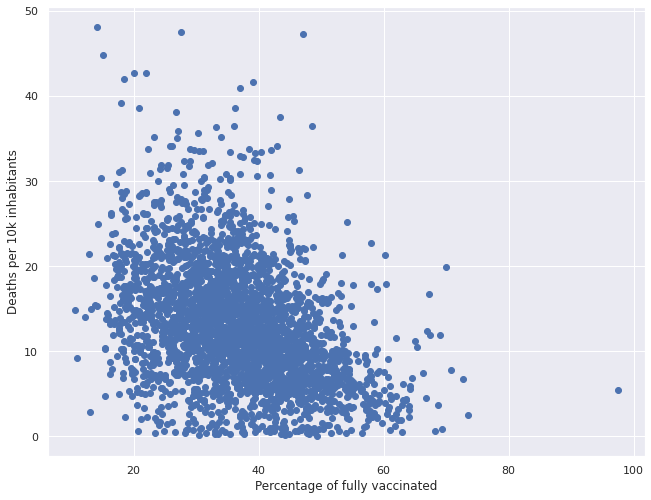

In [418]:
#Present the data of number of deaths caused by COVID19 against percentage of fully vaccinated
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop[x_name], filter_pop[y_name], alpha = 1)
plt.xlabel(x_name)
plt.ylabel(y_name)
#plt.savefig(path + x_name.replace(" ","") + '_' + y_name.replace(" ","") + "_" + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

### Part 2

<AxesSubplot:xlabel='Percentage of fully vaccinated', ylabel='Deaths per 10k inhabitants'>

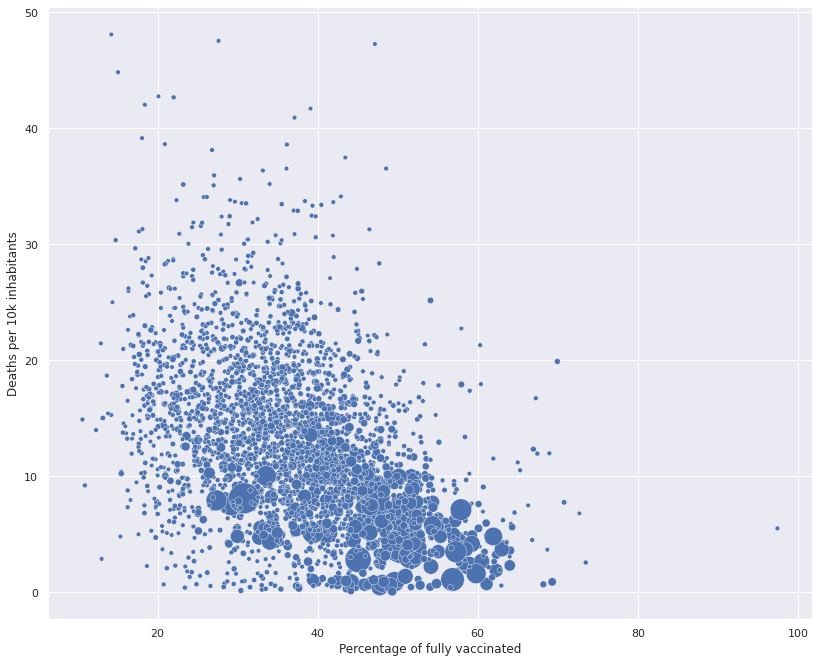

In [419]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x=x_name, y=y_name, size="Population", legend=False, sizes=(20, 2000))

<AxesSubplot:xlabel='Percentage of fully vaccinated', ylabel='Deaths per 10k inhabitants'>

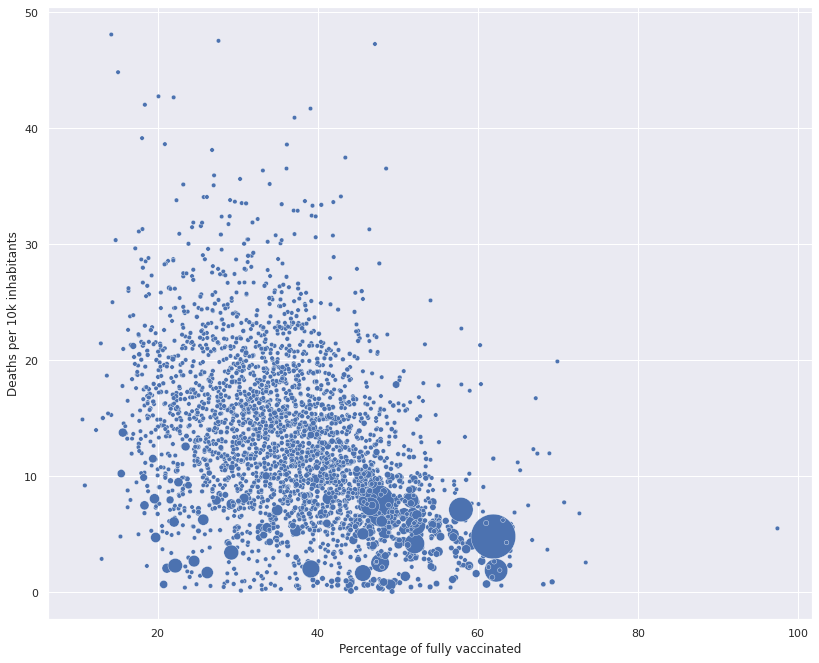

In [420]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x=x_name, y=y_name, size="Population Density", legend=False, sizes=(20, 2000))

### Part 3. Here are shown 3 plots which represent the whole data cut into 3 parts, based on given above propery ('Population' or 'Population Density').

[Text(0.5, 1.0, 'Population Density: above 12000')]

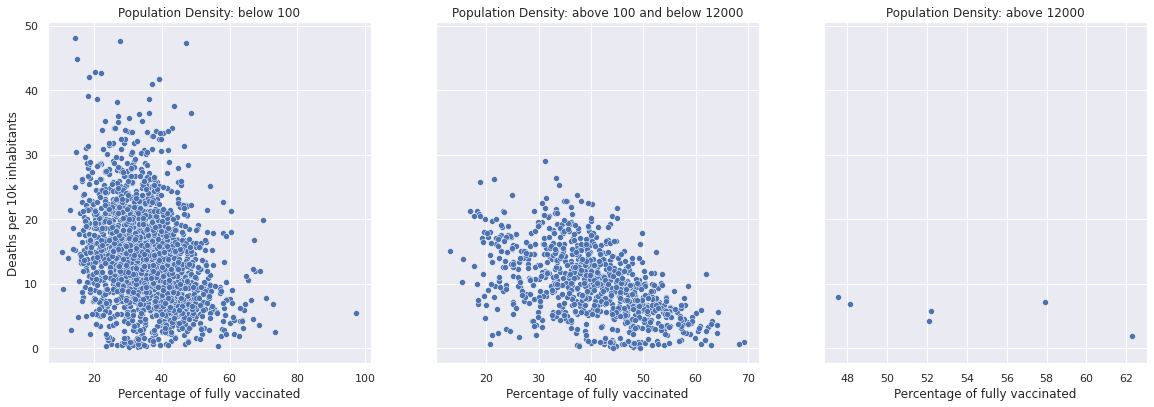

In [421]:
sns.set(rc={'figure.figsize':(19.7,6.27)})
fig, axs = plt.subplots(1,3,  sharey=True)
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= filter_pop[plot_dep].min()) & (filter_pop[plot_dep] < cut_point1) ], x=x_name, y=y_name, legend=False, sizes=(5, 500), alpha=1, ax=axs[0]).set(title = plot_dep + ': below ' + str(cut_point1))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point1) & (filter_pop[plot_dep] < cut_point2) ], x=x_name, y=y_name, legend=False, sizes=(5, 500), alpha=1, ax=axs[1]).set(title = plot_dep + ': above ' + str(cut_point1) + ' and below ' + str(cut_point2))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point2) & (filter_pop[plot_dep] < filter_pop[plot_dep].max()) ], x=x_name, y=y_name, legend=False, sizes=(5, 500), alpha=1, ax=axs[2]).set(title = plot_dep + ': above ' + str(cut_point2))

### Part 4. Here data is coloured based cutoff points of a given property 

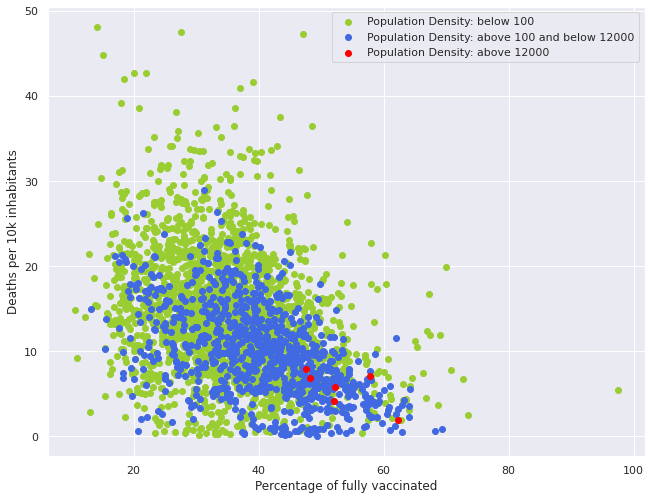

In [422]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
data1 = filter_pop[ (filter_pop[plot_dep] >= filter_pop[plot_dep].min()) & (filter_pop[plot_dep] < cut_point1) ]
plt.scatter(data1[x_name], data1[y_name], color='yellowgreen', label=plot_dep + ': below ' + str(cut_point1))
data2 = filter_pop[ (filter_pop[plot_dep] >= cut_point1) & (filter_pop[plot_dep] < cut_point2) ]
plt.scatter(data2[x_name], data2[y_name], color='royalblue', label=plot_dep + ': above ' + str(cut_point1) + ' and below ' + str(cut_point2))
data3 = filter_pop[ (filter_pop[plot_dep] >= cut_point2) & (filter_pop[plot_dep] < filter_pop[plot_dep].max()) ]
plt.scatter(data3[x_name], data3[y_name], color='red', label=plot_dep + ': above ' + str(cut_point2))
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.legend()
plt.savefig(path + 'fig10.png')

### Part 5. Analysis of specific cases

In [412]:
# Blaine county (Idaho)
filter_pop[filter_pop["countyFIPS"] == 16013]

,countyFIPS,County Name,State,Population,Land Area in square miles,Population Density,Cases_begin,Cases_end,Deaths_begin,Deaths_end,...,Complete65_begin,Complete65_end,Complete65_pct_begin,Complete65_pct_end,Cases in given period,Deaths in given period,Percentage of fully vaccinated,Percentage of vaccinated with booster,Infections per 10k inhabitants,Deaths per 10k inhabitants
557,16013,Blaine County,ID,23021,2643.59,8.708234,2363,4826,18,28,...,4294,4846,91.7,95.0,2463,10,63.6,NaN,1069.892707,4.34386


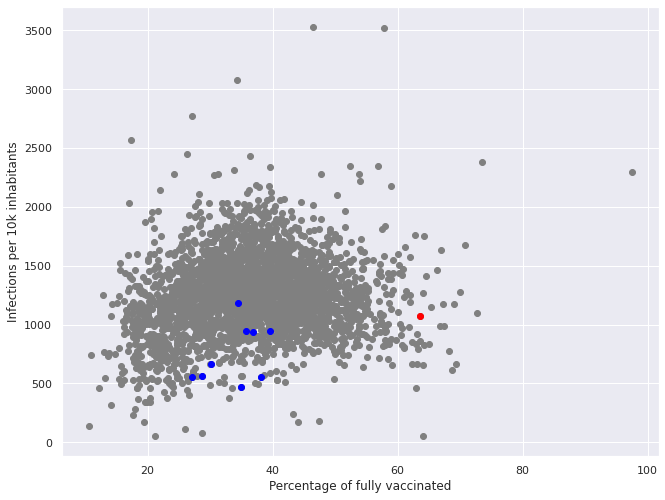

In [413]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop[x_name], filter_pop[y_name], color="gray")
blaine = filter_pop[filter_pop["countyFIPS"] == 16013]
blaine_neighbours = filter_pop[filter_pop["countyFIPS"].isin([16039, 16025, 16067, 16037, 16077, 16031, 16023, 16011, 16063])] #Neighbor counties with no data: Butte, Bingham, Lincoln
plt.scatter(blaine[x_name], blaine[y_name], color="red")
plt.scatter(blaine_neighbours[x_name], blaine_neighbours[y_name], color="blue")
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.savefig(path + 'fig8.png')

### Outliers

In [425]:
filter_pop[(filter_pop['Infections per 10k inhabitants'] > 1500) & (filter_pop['Percentage of fully vaccinated'] > 60)] #for December/January analysis

,countyFIPS,County Name,State,Population,Land Area in square miles,Population Density,Cases_begin,Cases_end,Deaths_begin,Deaths_end,...,Complete65_begin,Complete65_end,Complete65_pct_begin,Complete65_pct_end,Cases in given period,Deaths in given period,Percentage of fully vaccinated,Percentage of vaccinated with booster,Infections per 10k inhabitants,Deaths per 10k inhabitants
77,2110,City and Borough of Juneau,AK,31974,2701.93,11.833763,1359,6665,3,17,...,3916,4292,87.8,95.0,5306,14,61.25,NaN,1659.473322,4.378558
89,2220,City and Borough of Sitka,AK,8493,2870.34,2.958883,338,1824,1,6,...,1129,1263,82.8,92.6,1486,5,64.15,NaN,1749.676204,5.887201
98,4005,Coconino County,AZ,143476,18618.89,7.705937,17730,40683,329,438,...,17795,21602,95.4,95.0,22953,109,60.10,NaN,1599.779754,7.597089
108,4023,Santa Cruz County,AZ,46498,1236.92,37.591760,7919,15699,176,212,...,7583,9333,88.3,95.0,7780,36,70.80,NaN,1673.190245,7.742268
412,13053,Chattahoochee County,GA,10907,248.74,43.848999,3334,5840,15,21,...,1594,399,99.9,75.3,2506,6,97.45,NaN,2297.607041,5.501054
1279,26097,Mackinac County,MI,10799,1021.57,10.570984,619,2241,3,26,...,2315,2770,75.1,89.8,1622,23,60.30,NaN,1501.990925,21.298268
1812,35031,McKinley County,NM,71367,5449.81,13.095319,12231,23876,465,553,...,7370,9901,80.1,95.0,11645,88,66.95,NaN,1631.706531,12.330629
1858,36061,New York County,NY,1628706,22.83,71340.604468,135193,391973,4384,5166,...,183793,239066,66.6,86.6,256780,782,61.95,NaN,1576.589022,4.801358
2798,49043,Summit County,UT,42145,1871.71,22.516843,5499,12936,12,20,...,4428,6172,78.6,95.0,7437,8,62.75,NaN,1764.622138,1.898209
3138,56039,Teton County,WY,23464,3995.38,5.872783,3732,9323,9,15,...,2890,3579,77.8,95.0,5591,6,73.50,NaN,2382.799182,2.557109


In [426]:
filter_pop[(filter_pop['Infections per 10k inhabitants'] > 1000) & (filter_pop['Percentage of fully vaccinated'] > 90)] #for December/January analysis

,countyFIPS,County Name,State,Population,Land Area in square miles,Population Density,Cases_begin,Cases_end,Deaths_begin,Deaths_end,...,Complete65_begin,Complete65_end,Complete65_pct_begin,Complete65_pct_end,Cases in given period,Deaths in given period,Percentage of fully vaccinated,Percentage of vaccinated with booster,Infections per 10k inhabitants,Deaths per 10k inhabitants
412,13053,Chattahoochee County,GA,10907,248.74,43.848999,3334,5840,15,21,...,1594,399,99.9,75.3,2506,6,97.45,NaN,2297.607041,5.501054


In [427]:
filter_pop[ (filter_pop['Percentage of fully vaccinated'] > 90)] #for whole period analysis

,countyFIPS,County Name,State,Population,Land Area in square miles,Population Density,Cases_begin,Cases_end,Deaths_begin,Deaths_end,...,Complete65_begin,Complete65_end,Complete65_pct_begin,Complete65_pct_end,Cases in given period,Deaths in given period,Percentage of fully vaccinated,Percentage of vaccinated with booster,Infections per 10k inhabitants,Deaths per 10k inhabitants
412,13053,Chattahoochee County,GA,10907,248.74,43.848999,3334,5840,15,21,...,1594,399,99.9,75.3,2506,6,97.45,NaN,2297.607041,5.501054
